<a href="https://colab.research.google.com/github/nabilaranie/Database/blob/main/Copy_of_UAS_Kompstat_Kelompok_F_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nama Kelompok
1. Ammar Hanafi (2206051582)
2. Nabila Putri Maharani (2206053953)
3. Jason Justin Andryana (2206029670)
4. Norman Mowlana Aziz (2206025470)
5. Muhammad Riesya Attaya (2206051494)

**LATAR BELAKANG**

Indeks Masa Tubuh (BMI) adalah ukuran yang digunakan untuk mengevaluasi proporsi berat badan seseorang terhadap tinggi badannya. Penyakit yang mempengaruhi berat badan atau metabolisme dapat memiliki dampak signifikan terhadap nilai BMI seseorang. Perubahan berat badan atau nilai BMI juga dapat memengaruhi persepsi individu terhadap tubuhnya sendiri. Ketidakpuasan dengan citra tubuh bisa menjadi faktor risiko dalam masalah kesehatan mental seperti gangguan makan, depresi, atau kecemasan.

**Rumusan Masalah**

Mengenai apa dataset tersebut serta apa saja insight yang bisa didapatkan dari dataset yang diberikan?
Apakah usia dapat mempengaruhi perubahan Indeks Masa Tubuh(IMT)?
Apakah pengeluaran bulanan  dapat mempengaruhi perubahan Indeks Masa Tubuh(IMT)?

**Tujuan**

Memahami data serta mengidentifikasi pengaruh pengeluaran bulanan terhadap nilai IMT  
Mengetahui  pengaruh usia terhadapa IMT
Mendapatkan Insight dari dataset yang diberikan

# Import Data

Data asli: [https://drive.google.com/file/d/1BbPJGIWhQg-pfVlb6hHze95fLe6U61kF/view?usp=sharing)](https://drive.google.com/file/d/1BbPJGIWhQg-pfVlb6hHze95fLe6U61kF/view?usp=sharing)

Pertama pakai cara langsung akses dari drive dulu tapi biasanya lama kalau datanya berukuran besar

In [ ]:
# import pandas as pd

In [ ]:
# !gdown 1BbPJGIWhQg-pfVlb6hHze95fLe6U61kF

In [ ]:
# !7z e data_kesehatan-Mental-SRQ-2023--Filtered.7z

In [ ]:
# df = pd.read_excel('/content/data_kesehatan-Mental-SRQ-2023--Filtered.xlsx') # buat dalam bentuk dataframe

In [ ]:
# df.to_pickle("data_kesehatan-Mental-SRQ-2023--Filtered.pkl") # Kita ubah menjadi file pickle mempercepat running/coding

File pickle sudah di upload kedalam gdrive ini dan tinggal didownload dari linknya
https://drive.google.com/file/d/1j1UNckTeNYmeUlKnprcHUkEcBLrF6U0i/view?usp=drive_link

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from numba import prange
from numba import jit
import warnings
import warnings
from numba import NumbaPendingDeprecationWarning
warnings.filterwarnings("ignore", category=NumbaPendingDeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning, module="pandas")
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

In [ ]:
!gdown 1j1UNckTeNYmeUlKnprcHUkEcBLrF6U0i #download dari linknya

Downloading...
From: https://drive.google.com/uc?id=1j1UNckTeNYmeUlKnprcHUkEcBLrF6U0i
To: /content/data_kesehatan-Mental-SRQ-2023--Filtered.pkl
100% 59.2M/59.2M [00:00<00:00, 113MB/s]


In [ ]:
df = pd.read_pickle("data_kesehatan-Mental-SRQ-2023--Filtered.pkl") #masukan kedalam df

In [ ]:
df.head() #dfnya

ID WILAYAH JENIS KELAMIN  USIA  LAMA BERDINAS PENDIDIKAN TERAKHIR  \
0   1  KALBAR   LAKI - LAKI  34.0           16.0                 SMA   
1   2  KALBAR   LAKI - LAKI  43.0           23.0                 SMA   
2   3  KALBAR   LAKI - LAKI  21.0            1.0                 SMA   
3   4  KALBAR   LAKI - LAKI  40.0           23.0                  S2   
4   5  KALBAR   LAKI - LAKI  28.0            9.0                 SMA   

  TINGGI BADAN  BERAT BADAN  LINGKAR PINGGANG Status Perkawinan  \
0        168.9         85.0             100.0           Menikah   
1        169.5         70.0              80.0           Menikah   
2        169.5         60.0              78.0     Belum Menikah   
3        166.8         80.0              34.0           Menikah   
4        164.5         62.0              32.0           Menikah   

         PENGELUARAN/BULAN  \
0  Rp. 7 Juta s.d. 10 Juta   
1   Rp. 2 Juta s.d. 6 Juta   
2   Rp. 2 Juta s.d. 6 Juta   
3  Rp. 7 Juta s.d. 10 Juta   
4   Rp. 2 Juta s.d. 6 Juta   

  Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?  \
0                                              Tidak                    
1                                              Tidak                    
2                                              Tidak                    
3                                              Tidak                    
4                                              Tidak                    

  Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?  \
0                                              Tidak                   
1                                              Tidak                   
2                                              Tidak                   
3                                              Tidak                   
4                                              Tidak                   

  Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?  \
0                                              Tidak                             
1                                              Tidak                             
2                                              Tidak                             
3                                              Tidak                             
4                                              Tidak                             

  Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?  \
0                                              Tidak                       
1                                              Tidak                       
2                                              Tidak                       
3                                              Tidak                       
4                                              Tidak                       

  Apakah saudara pernah di diagnosa atau menderita penyakit Kanker ?  \
0                                              Tidak                   
1                                              Tidak                   
2                                              Tidak                   
3                                              Tidak                   
4                                              Tidak                   

  Apakah saudara pernah di diagnosa atau menderita penyakit Ginjal ?  \
0                                              Tidak                   
1                                              Tidak                   
2                                              Tidak                   
3                                              Tidak                   
4                                              Tidak                   

  Apakah saudara pernah di diagnosa atau menderita penyakit Tumor ?  \
0                                              Tidak                  
1                                              Tidak                  
2                                              Tidak                  
3             

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289801 entries, 0 to 289800
Data columns (total 79 columns):
 #   Column                                                                                                             Non-Null Count   Dtype  
---  ------                                                                                                             --------------   -----  
 0   ID                                                                                                                 289801 non-null  int64  
 1   WILAYAH                                                                                                            289801 non-null  object 
 2   JENIS KELAMIN                                                                                                      289801 non-null  object 
 3   USIA                                                                                                               289801 non-null  float64
 4   LAMA BERDINAS 

#Preprocessing with Data Aggregation Approach

## Menghapus Kolom yang tidak penting

In [ ]:
# Menghapus kolom pertama menggunakan del
del df['ID']

## Menghapus outlier

In [ ]:
#Karena ada beberapa entry non-numeric
df['TINGGI BADAN'] = pd.to_numeric(df['TINGGI BADAN'], errors='coerce')
df = df.dropna(subset=['TINGGI BADAN']).reset_index(drop=True)

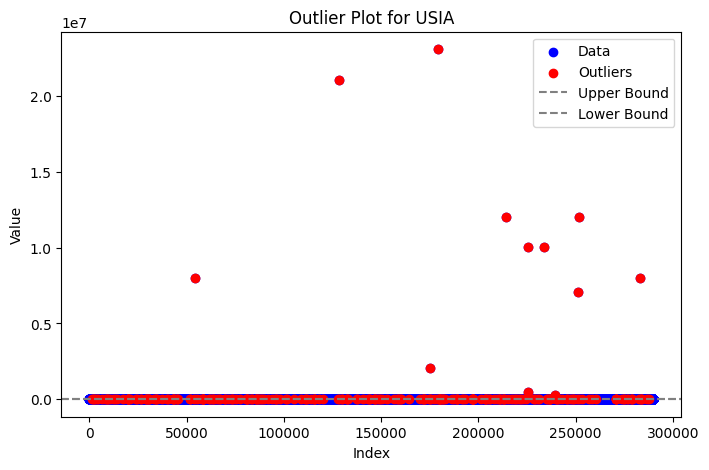

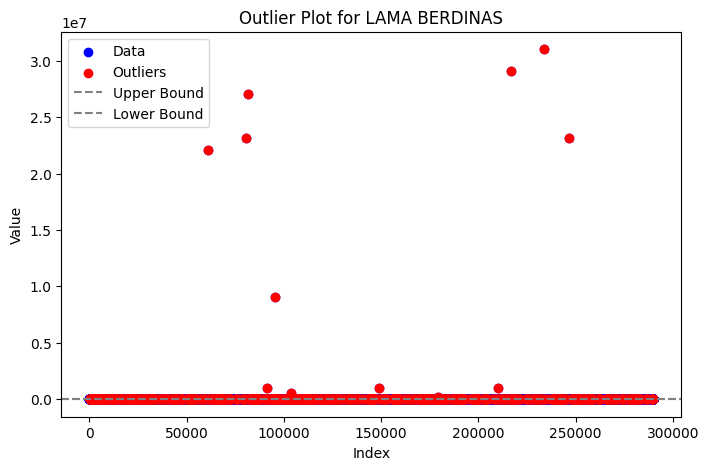

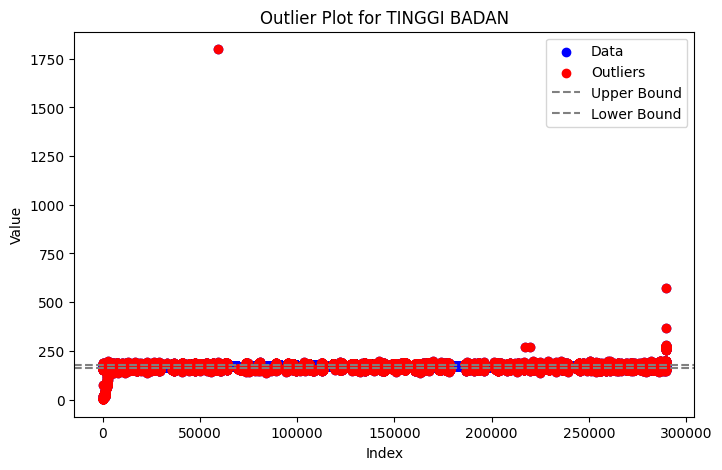

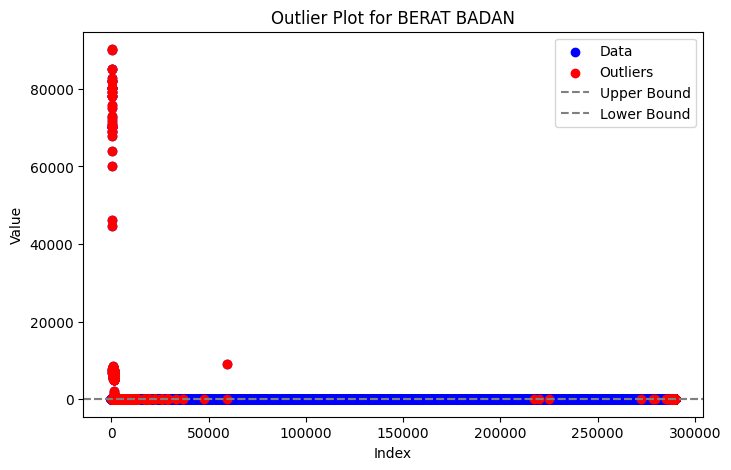

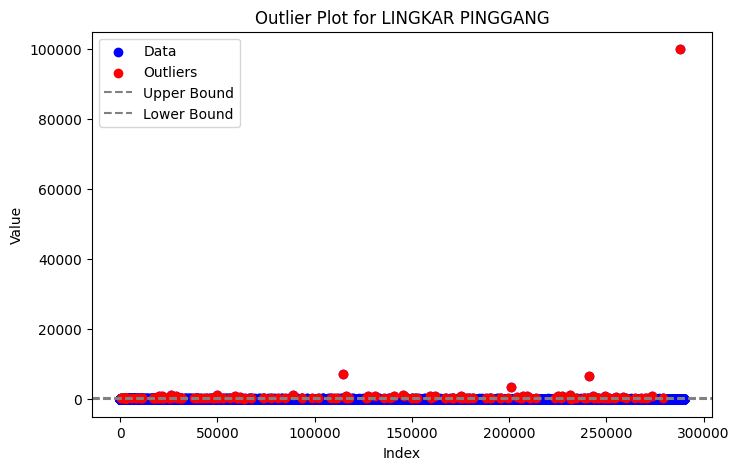

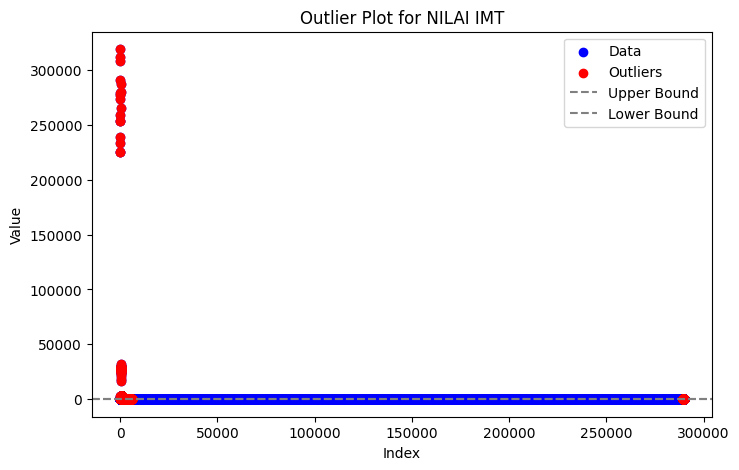

In [ ]:
# Pilih hanya kolom-kolom yang bertipe numerik
numeric_columns = df.select_dtypes(include='number').columns

# Hitung batas atas dan bawah menggunakan IQR untuk setiap kolom numerik
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identifikasi outlier untuk setiap kolom numerik
outliers = (df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)

# Membuat plot terpisah untuk setiap kolom numerik
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.scatter(range(len(df[col])), df[col], c='blue', label='Data')
    plt.scatter(np.where(outliers[col])[0], df[col][outliers[col]], c='red', label='Outliers')
    plt.axhline(upper_bound[col], color='gray', linestyle='--', label='Upper Bound')
    plt.axhline(lower_bound[col], color='gray', linestyle='--', label='Lower Bound')

    plt.title(f'Outlier Plot for {col}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()

    plt.show()

In [ ]:
#Age stuff idk, maybe use diff number other than -17?
def RowFix(row):
  if row['USIA']-17 <= row['LAMA BERDINAS']:
    row['LAMA BERDINAS'] = None
  if row['TINGGI BADAN'] <= row['LINGKAR PINGGANG']:
    row['LINGKAR PINGGANG'] = None
  return row
df = df.apply(RowFix, axis=1).dropna(subset=['LAMA BERDINAS', 'LINGKAR PINGGANG']).reset_index(drop=True)
df.head()

WILAYAH JENIS KELAMIN  USIA  LAMA BERDINAS PENDIDIKAN TERAKHIR  \
0  KALBAR   LAKI - LAKI  34.0           16.0                 SMA   
1  KALBAR   LAKI - LAKI  43.0           23.0                 SMA   
2  KALBAR   LAKI - LAKI  21.0            1.0                 SMA   
3  KALBAR   LAKI - LAKI  28.0            9.0                 SMA   
4  KALBAR   LAKI - LAKI  47.0           25.0                 SMP   

   TINGGI BADAN  BERAT BADAN  LINGKAR PINGGANG Status Perkawinan  \
0         168.9         85.0             100.0           Menikah   
1         169.5         70.0              80.0           Menikah   
2         169.5         60.0              78.0     Belum Menikah   
3         164.5         62.0              32.0           Menikah   
4         165.5         63.0              32.0           Menikah   

         PENGELUARAN/BULAN  \
0  Rp. 7 Juta s.d. 10 Juta   
1   Rp. 2 Juta s.d. 6 Juta   
2   Rp. 2 Juta s.d. 6 Juta   
3   Rp. 2 Juta s.d. 6 Juta   
4   Rp. 2 Juta s.d. 6 Juta   

  Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?  \
0                                              Tidak                    
1                                              Tidak                    
2                                              Tidak                    
3                                              Tidak                    
4                                              Tidak                    

  Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?  \
0                                              Tidak                   
1                                              Tidak                   
2                                              Tidak                   
3                                              Tidak                   
4                                              Tidak                   

  Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?  \
0                                              Tidak                             
1                                              Tidak                             
2                                              Tidak                             
3                                              Tidak                             
4                                              Tidak                             

  Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?  \
0                                              Tidak                       
1                                              Tidak                       
2                                              Tidak                       
3                                              Tidak                       
4                                              Tidak                       

  Apakah saudara pernah di diagnosa atau menderita penyakit Kanker ?  \
0                                              Tidak                   
1                                              Tidak                   
2                                              Tidak                   
3                                              Tidak                   
4                                              Tidak                   

  Apakah saudara pernah di diagnosa atau menderita penyakit Ginjal ?  \
0                                              Tidak                   
1                                              Tidak                   
2                                              Tidak                   
3                                              Tidak                   
4                                              Tidak                   

  Apakah saudara pernah di diagnosa atau menderita penyakit Tumor ?  \
0                                              Tidak                  
1                                              Tidak                  
2                                              Tidak                  
3                              

In [ ]:
# Penyaringan Mentah untuk Outlier Besar
df = df[(df['USIA'] <= 100) & (df['LAMA BERDINAS'] <= 84) & (df['TINGGI BADAN'] <= 200) & (df['BERAT BADAN'] <= 600) & (df['LINGKAR PINGGANG'] <= 300)].reset_index(drop=True)
df = df[(df['USIA'] > 0) & (df['LAMA BERDINAS'] >= 0) & (df['TINGGI BADAN'] >= 40) & (df['BERAT BADAN'] >= 30) & (df['LINGKAR PINGGANG'] >= 30)].reset_index(drop=True)
df.head()

WILAYAH JENIS KELAMIN  USIA  LAMA BERDINAS PENDIDIKAN TERAKHIR  \
0  KALBAR   LAKI - LAKI  34.0           16.0                 SMA   
1  KALBAR   LAKI - LAKI  43.0           23.0                 SMA   
2  KALBAR   LAKI - LAKI  21.0            1.0                 SMA   
3  KALBAR   LAKI - LAKI  28.0            9.0                 SMA   
4  KALBAR   LAKI - LAKI  47.0           25.0                 SMP   

   TINGGI BADAN  BERAT BADAN  LINGKAR PINGGANG Status Perkawinan  \
0         168.9         85.0             100.0           Menikah   
1         169.5         70.0              80.0           Menikah   
2         169.5         60.0              78.0     Belum Menikah   
3         164.5         62.0              32.0           Menikah   
4         165.5         63.0              32.0           Menikah   

         PENGELUARAN/BULAN  \
0  Rp. 7 Juta s.d. 10 Juta   
1   Rp. 2 Juta s.d. 6 Juta   
2   Rp. 2 Juta s.d. 6 Juta   
3   Rp. 2 Juta s.d. 6 Juta   
4   Rp. 2 Juta s.d. 6 Juta   

  Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?  \
0                                              Tidak                    
1                                              Tidak                    
2                                              Tidak                    
3                                              Tidak                    
4                                              Tidak                    

  Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?  \
0                                              Tidak                   
1                                              Tidak                   
2                                              Tidak                   
3                                              Tidak                   
4                                              Tidak                   

  Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?  \
0                                              Tidak                             
1                                              Tidak                             
2                                              Tidak                             
3                                              Tidak                             
4                                              Tidak                             

  Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?  \
0                                              Tidak                       
1                                              Tidak                       
2                                              Tidak                       
3                                              Tidak                       
4                                              Tidak                       

  Apakah saudara pernah di diagnosa atau menderita penyakit Kanker ?  \
0                                              Tidak                   
1                                              Tidak                   
2                                              Tidak                   
3                                              Tidak                   
4                                              Tidak                   

  Apakah saudara pernah di diagnosa atau menderita penyakit Ginjal ?  \
0                                              Tidak                   
1                                              Tidak                   
2                                              Tidak                   
3                                              Tidak                   
4                                              Tidak                   

  Apakah saudara pernah di diagnosa atau menderita penyakit Tumor ?  \
0                                              Tidak                  
1                                              Tidak                  
2                                              Tidak                  
3                              

In [ ]:
# Melihat interval berdasarkan jenis kelamin dan IMT nya
df.groupby([df['JENIS KELAMIN'], df['IMT']]).agg(['mean', 'max', 'min'])

<ipython-input-16-5392b4937f2f>:2: FutureWarning: ['WILAYAH', 'PENDIDIKAN TERAKHIR', 'Status Perkawinan', 'PENGELUARAN/BULAN', 'Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?', 'Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?', 'Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?', 'Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?', 'Apakah saudara pernah di diagnosa atau menderita penyakit Kanker ?', 'Apakah saudara pernah di diagnosa atau menderita penyakit Ginjal ?', 'Apakah saudara pernah di diagnosa atau menderita penyakit Tumor ?', 'Apakah saudara pernah di diagnosa atau menderita penyakit Osteoartritis ?', 'Apakah saudara pernah di diagnosa atau menderita penyakit Lambung ?', 'Apakah saudara pernah di diagnosa atau menderita penyakit Liver ?', 'Apakah saudara pernah di diagnosa atau menderita penyakit  Tuberculosis (TBC) ?', 'Apakah saudara pernah di diagnosa atau menderita penyakit  Demam Ber

USIA              LAMA BERDINAS             \
                                 mean    max   min          mean   max  min   
JENIS KELAMIN IMT                                                             
LAKI - LAKI   Gemuk         38.689887  100.0  18.0     18.082876  42.0  0.0   
              Kurus         34.482270   58.0  18.0     13.065603  37.0  0.0   
              Normal        35.022935  100.0  18.0     14.489235  60.0  0.0   
              Obesitas      39.768622  100.0  18.0     19.179054  46.0  0.0   
              Sangat Kurus  37.285714   56.0  19.0     15.411429  34.0  0.0   
PEREMPUAN     Gemuk         37.876579   71.0  19.0     16.036200  39.0  1.0   
              Kurus         34.695402   58.0  19.0     12.204023  35.0  0.5   
              Normal        34.632765   97.0  18.0     12.986896  40.0  0.0   
              Obesitas      40.832415   90.0  19.0     18.162470  39.0  0.0   
              Sangat Kurus  39.222222   55.0  22.0     15.000000  30.0  2.0   

                           TINGGI BADAN               BERAT BADAN         \
                                   mean    max    min        mean    max   
JENIS KELAMIN IMT                                                          
LAKI - LAKI   Gemuk          170.128879  197.0  140.0   75.146898  100.0   
              Kurus          170.483156  198.0  156.0   52.351064   70.0   
              Normal         170.049491  198.0  135.0   66.615353   90.0   
              Obesitas       169.969064  195.0   46.0   85.661244  589.0   
              Sangat Kurus   170.640000  199.0  155.0   45.005714   65.0   
PEREMPUAN     Gemuk          161.300413  186.0  140.0   67.462925   91.0   
              Kurus          161.431034  180.0  145.0   46.787356   59.0   
              Normal         161.526951  195.0  138.0   59.224379   80.0   
              Obesitas       160.556255  178.0   55.0   78.304288  569.0   
              Sangat Kurus   161.370370  172.0  145.0   41.962963   49.0   

                                 LINGKAR PINGGANG               NILAI IMT  \
                             min             mean    max   min       mean   
JENIS KELAMIN IMT                                                           
LAKI - LAKI   Gemuk         49.0        65.293197  163.0  30.0  25.946056   
              Kurus         44.0        52.065603  120.0  30.0  17.995621   
              Normal        45.0        59.385387  170.0  30.0  23.026619   
              Obesitas      50.0        72.771910  190.0  30.0  29.863706   
              Sangat Kurus  30.0        54.154286  100.0  30.0  15.432473   
PEREMPUAN     Gemuk         50.0        78.315962  132.0  30.0  25.907878   
              Kurus         38.0        63.925287  100.0  30.0  17.928995   
              Normal        40.0        71.678360  160.0  30.0  22.678018   
              Obesitas      53.0        86.840677  167.0  30.0  30.454730   
              Sangat Kurus  34.0        60.703704   85.0  30.0  16.109104   

                                                   
                                   max        min  
JENIS KELAMIN IMT                                  
LAKI - LAKI   Gemuk          26.989619  25.000000  
              Kurus          18.496499  17.006803  
              Normal         24.977043  18.507766  
              Obesitas      372.020495  27.005131  
              Sangat Kurus   16.979592   9.908839  
PEREMPUAN     Gemuk          26.989619  25.000000  
              Kurus          18.491124  17.006803  
              Normal         24.998904  18.517804  
              Obesitas      259.375000  27.005131  
              Sangat Kurus   16.974654  12.191186

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


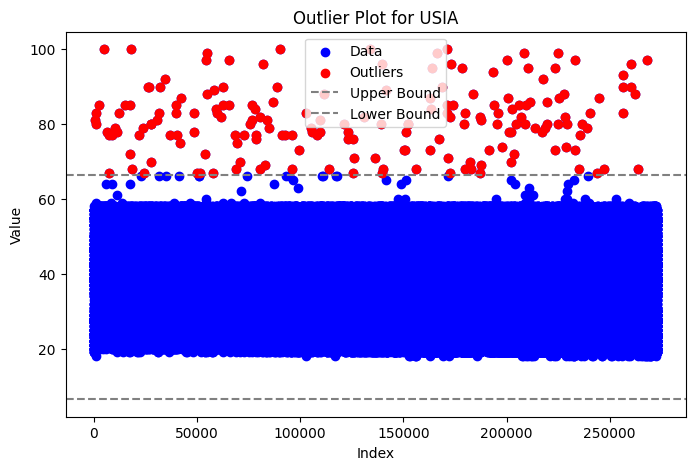

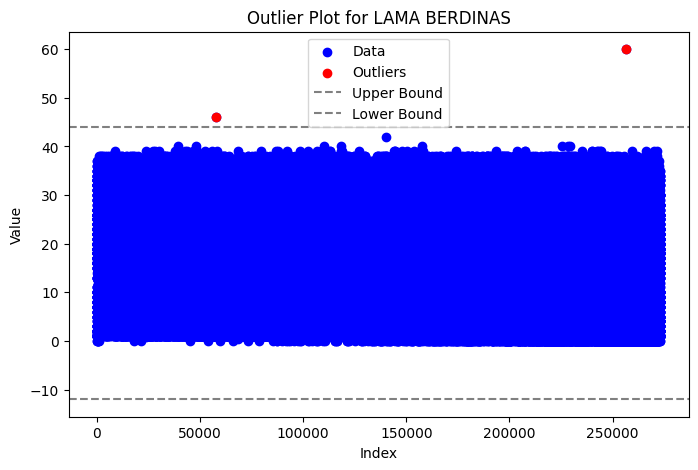

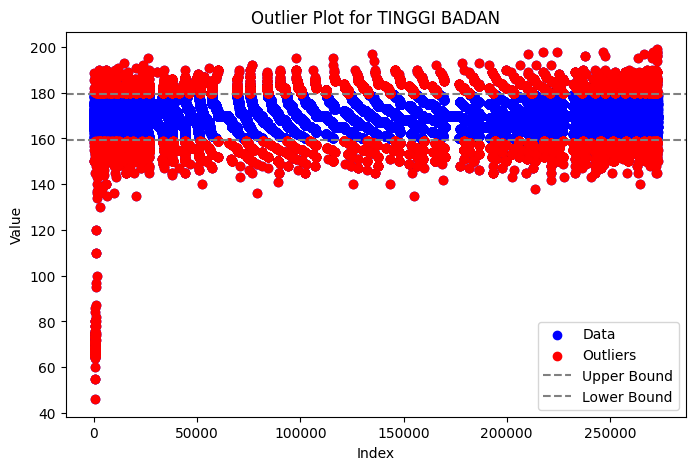

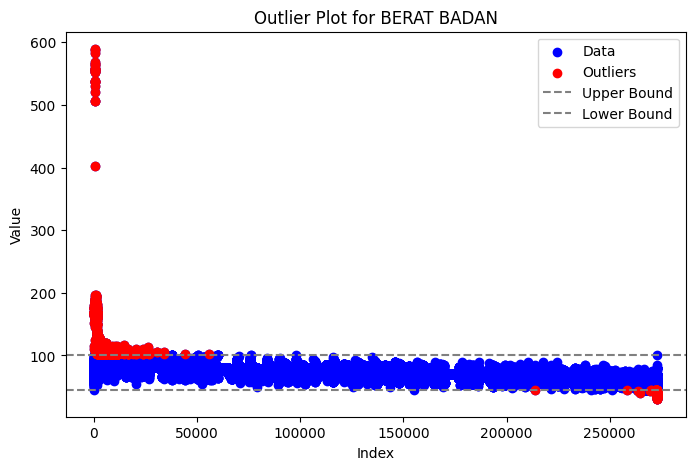

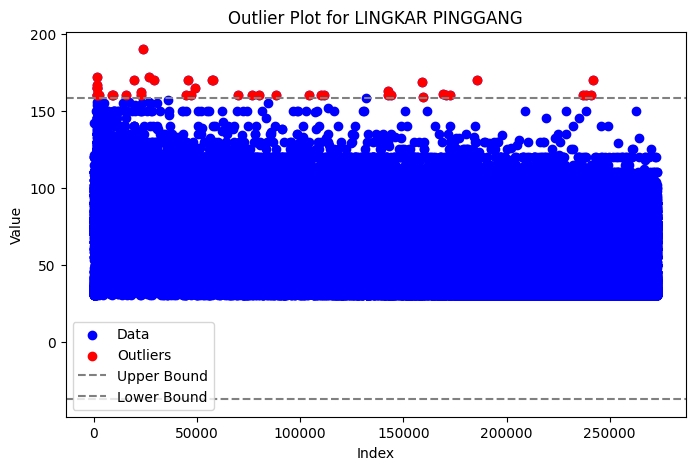

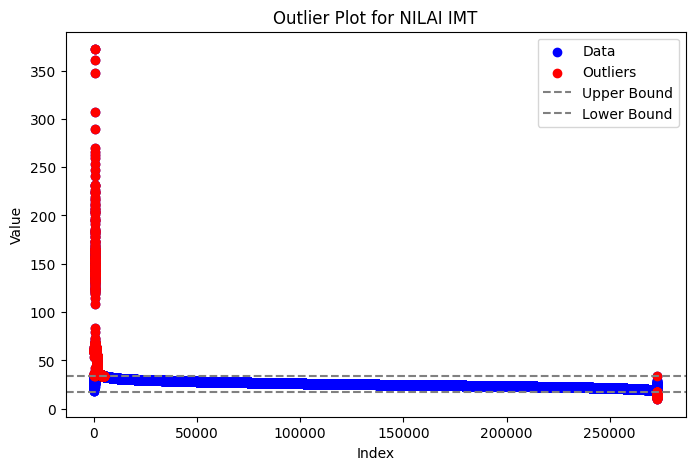

In [ ]:
# Pilih hanya kolom-kolom yang bertipe numerik
numeric_columns = df.select_dtypes(include='number').columns

# Hitung batas atas dan bawah menggunakan IQR untuk setiap kolom numerik
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identifikasi outlier untuk setiap kolom numerik
outliers = (df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)

# Membuat plot terpisah untuk setiap kolom numerik
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.scatter(range(len(df[col])), df[col], c='blue', label='Data')
    plt.scatter(np.where(outliers[col])[0], df[col][outliers[col]], c='red', label='Outliers')
    plt.axhline(upper_bound[col], color='gray', linestyle='--', label='Upper Bound')
    plt.axhline(lower_bound[col], color='gray', linestyle='--', label='Lower Bound')

    plt.title(f'Outlier Plot for {col}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()

    plt.show()

In [ ]:
list(set(pd.Categorical(df['PENGELUARAN/BULAN'])))

['Rp. 2 Juta s.d. 6 Juta',
 'Di atas Rp. 15 Juta',
 'Rp. 11 Juta s.d. 14 Juta',
 'Rp. 7 Juta s.d. 10 Juta']

In [ ]:
hue_order = [list(set(pd.Categorical(df['PENGELUARAN/BULAN'])))[1], list(set(pd.Categorical(df['PENGELUARAN/BULAN'])))[3], list(set(pd.Categorical(df['PENGELUARAN/BULAN'])))[2], list(set(pd.Categorical(df['PENGELUARAN/BULAN'])))[0]]

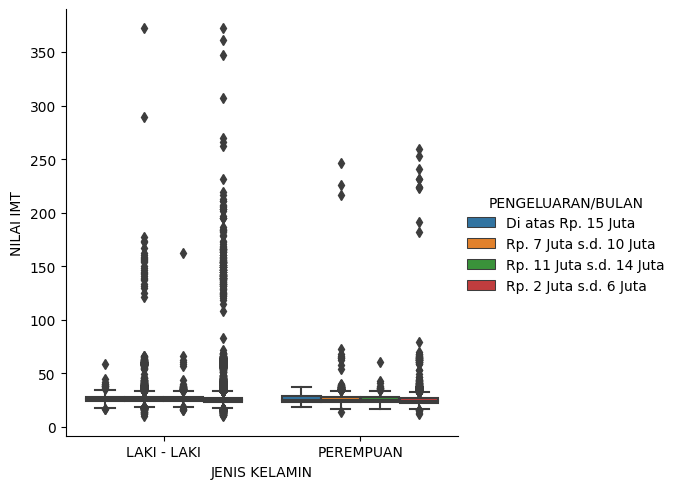

In [ ]:
sns.catplot(data=df, x="JENIS KELAMIN", y="NILAI IMT", hue="PENGELUARAN/BULAN", hue_order=hue_order, kind="box")

In [ ]:
df.iloc[:,[10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]].value_counts()

Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?  Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?  Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?  Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?  Apakah saudara pernah di diagnosa atau menderita penyakit Kanker ?  Apakah saudara pernah di diagnosa atau menderita penyakit Ginjal ?  Apakah saudara pernah di diagnosa atau menderita penyakit Tumor ?  Apakah saudara pernah di diagnosa atau menderita penyakit Osteoartritis ?  Apakah saudara pernah di diagnosa atau menderita penyakit Lambung ?  Apakah saudara pernah di diagnosa atau menderita penyakit Liver ?  Apakah saudara pernah di diagnosa atau menderita penyakit  Tuberculosis (TBC) ?  Apakah saudara pernah di diagnosa atau menderita penyakit  Demam Berdarah Dengue (DBD) ?  Apakah saudara pernah di diagnosa atau menderita penyakit  COVID-19 ?  Apakah saudara pernah di diagnosa atau menderita penyakit

<ipython-input-30-249f37953653>:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


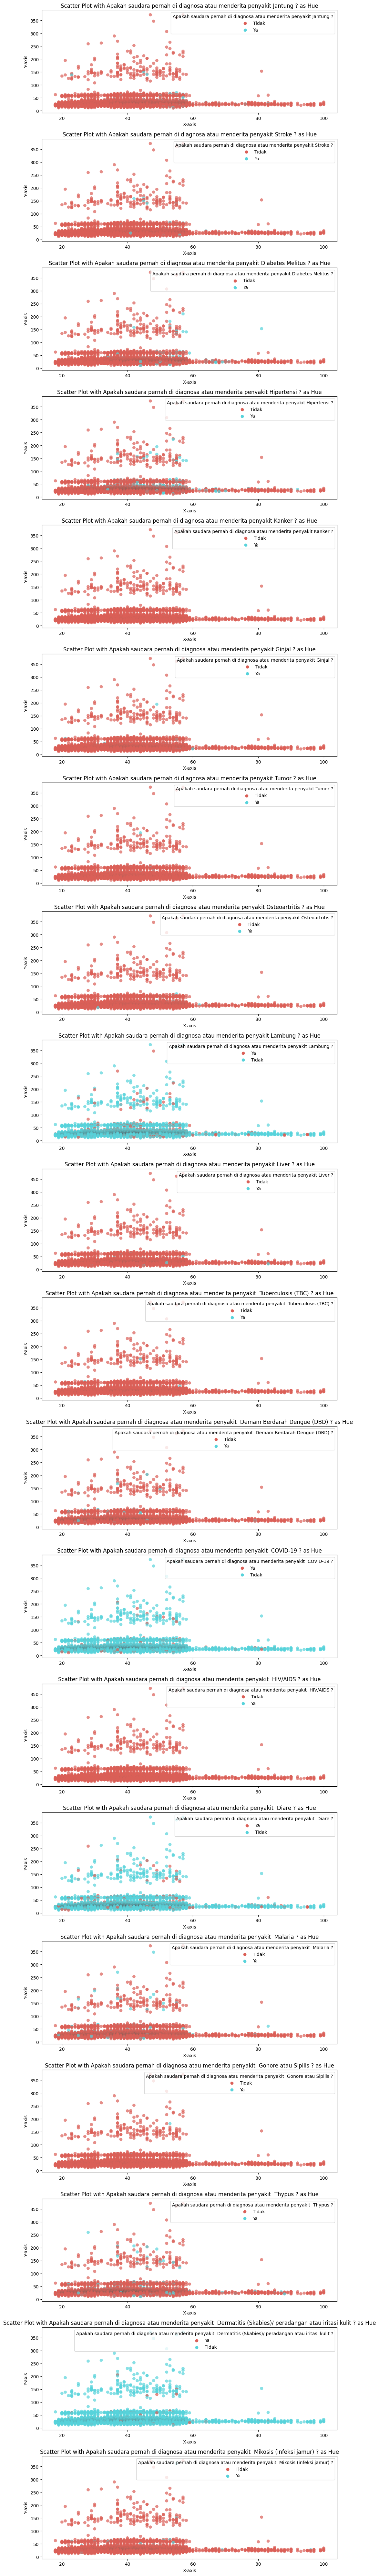

In [ ]:
# x = usia y = nilai imt penyakit , column 10:29

# Get the list of categorical columns
categorical_columns = df.iloc[:,[10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]].select_dtypes(include='object').columns
categorical_columns

# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 4 * len(categorical_columns)))

# Loop through categorical columns and create scatter plots
for i, column in enumerate(categorical_columns):
    ax = axes[i]
    sns.scatterplot(data=df, x='USIA', y='NILAI IMT', hue=column, palette='hls', s=50, ax=ax,linewidth=0, alpha = 0.7)
    ax.set_title(f'Scatter Plot with {column} as Hue')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.legend(title=column)

# Adjust layout
plt.tight_layout()
plt.show()


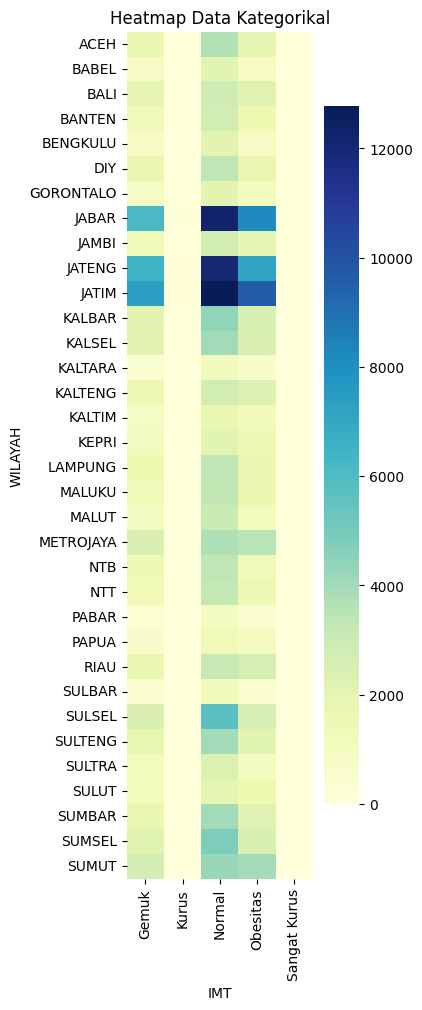

In [ ]:
# Membuat heatmap dengan tabel kontingensi dari IMT dan WILAYAH
tabel = pd.crosstab(df['WILAYAH'], df['IMT'])
plt.figure(figsize=(3, 11))
sns.heatmap(tabel, annot=False, cmap='YlGnBu', fmt='d')
plt.title('Heatmap Data Kategorikal')
plt.xlabel('IMT')
plt.ylabel('WILAYAH')
plt.show()

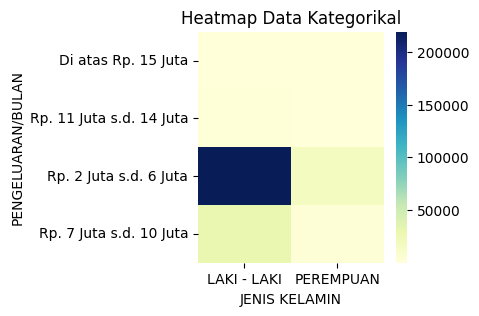

In [ ]:
# Membuat heatmap dengan tabel kontingensi dari IMT dan WILAYAH
tabel = pd.crosstab(df['PENGELUARAN/BULAN'], df['JENIS KELAMIN'])
plt.figure(figsize=(3, 3))
sns.heatmap(tabel, annot=False, cmap='YlGnBu', fmt='d')
plt.title('Heatmap Data Kategorikal')
plt.xlabel('JENIS KELAMIN')
plt.ylabel('PENGELUARAN/BULAN')
plt.show()

# Fungsi Clustering dan berapa contoh


## Cara 1 (Pool)


Rumus Jarak General yang kita pakai adalah Minowski Formula

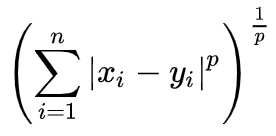

Dengan saat p = 1 adalah rumus untuk Manhatan distance dan p = 2 adalah rumus untuk Euclidean distance.



### Clustering tanpa Paralel Programming

#### Function

In [ ]:
import pandas as pd #import module pandas dan numpy
import numpy as np


#fungsi yang menggunakan rumus minowski
def jarak(row, cluster_center, orde):
    sum_val = sum(abs(row - cluster_center)**orde)
    distance = sum_val**(1/orde)
    return distance

#setiap row pada datframe akan di cek terletak pada mana dengan fungsi ini
def assign_clusters(data_frame, cluster_centers, orde):
    clusters = {f'Cluster {i+1}': [] for i in range(len(cluster_centers))}
    for index, row in data_frame.iterrows():
        distances = [jarak(row, cluster, orde) for cluster in cluster_centers]
        min_index = distances.index(min(distances))
        cluster_name = f'Cluster {min_index + 1}'
        clusters[cluster_name].append(index)
    return clusters

#setelah mencari cluster baru seperti di atas akan di cek centroid baru terletak pada dimana
def update_cluster_centers(data_frame, clusters):
    new_cluster_centers = []
    for cluster_name, points in clusters.items():
        # Ensure that points is not empty to avoid NaN in cluster centers
        if points:
            cluster_center = data_frame.loc[points].mean().to_numpy()
            new_cluster_centers.append(cluster_center)
        else:
            # If points is empty, keep the existing cluster center
            new_cluster_centers.append(np.nan)

    return new_cluster_centers

#fungsi ini akan melakukan semua proses diatas dengan iterasi maksimum atau hingga konvergen
def clustering(original_data_frame, orde, num_clusters, max_iterations=2):
    # Create a copy of the original DataFrame
    data_frame = original_data_frame.copy()
    # Initialize cluster centers randomly
    cluster_centers = [data_frame.sample().iloc[0].to_numpy() for _ in range(num_clusters)] #cluster awal adalah sample random yang diambil dari data
    iterations = 0
    while iterations < max_iterations:
        # Assign data points to clusters
        clusters = assign_clusters(data_frame, cluster_centers, orde)

        # Update cluster centers
        new_cluster_centers = update_cluster_centers(data_frame, clusters)

        # Check for convergence
        if np.allclose(new_cluster_centers, cluster_centers, atol=1e-4, equal_nan=True):
            break
        # Update cluster centers for the next iteration
        cluster_centers = new_cluster_centers
        iterations += 1
    # Add a new column to the new DataFrame indicating the assigned cluster
    data_frame['Cluster'] = None
    for cluster_name, points in clusters.items():
        data_frame.loc[points, 'Cluster'] = cluster_name

    return data_frame, clusters, cluster_centers


#### Contoh (Usia Dan Lama Kedinasaan)

In [ ]:
datausiadinastotal = df.iloc[:,[2,3]]
datausiadinastotal

USIA  LAMA BERDINAS
0       34.0           16.0
1       43.0           23.0
2       21.0            1.0
3       28.0            9.0
4       47.0           25.0
...      ...            ...
273128  53.0           33.0
273129  23.0            4.0
273130  54.0           27.0
273131  35.0           17.0
273132  19.0            1.0

[273133 rows x 2 columns]

In [ ]:
result_dfusiadinastotal, result_clustersusiadinastotal, cluster_centersusiadinastotal = clustering(datausiadinastotal, 2, 4)
result_dfusiadinastotal

USIA  LAMA BERDINAS    Cluster
0       34.0           16.0  Cluster 3
1       43.0           23.0  Cluster 1
2       21.0            1.0  Cluster 4
3       28.0            9.0  Cluster 4
4       47.0           25.0  Cluster 2
...      ...            ...        ...
273128  53.0           33.0  Cluster 2
273129  23.0            4.0  Cluster 4
273130  54.0           27.0  Cluster 2
273131  35.0           17.0  Cluster 3
273132  19.0            1.0  Cluster 4

[273133 rows x 3 columns]

In [ ]:
# result_dfusiadinastotal.to_pickle("Usia dan Lama Berdinas.pkl") #running sangat lama jadi kami save dalam bentuk pickle untuk memanggil lebih cepat
# result_dfusiadinastotal = pd.read_pickle("Usia dan Lama Berdinas.pkl")

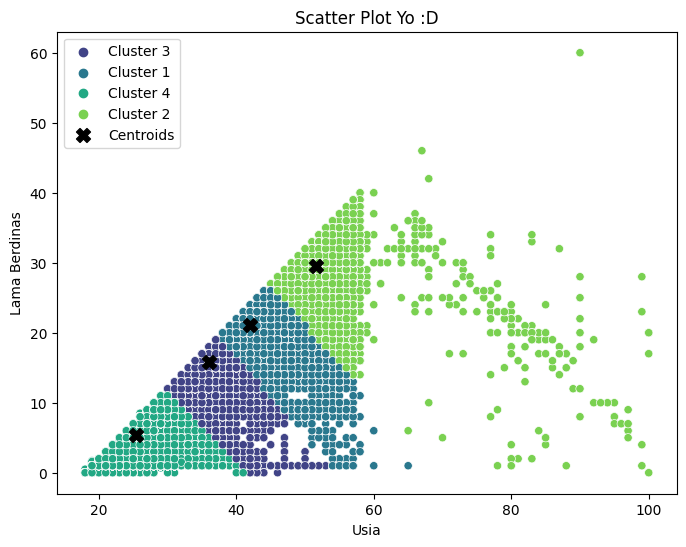

In [ ]:
plt.figure(figsize=(8, 6))
cluster_centers1 = np.array(cluster_centersusiadinastotal) # ubah untuk hasil df lain
sns.scatterplot(x="USIA", y="LAMA BERDINAS", hue='Cluster', data=result_dfusiadinastotal, palette='viridis')  # ubah untuk hasil df lain
plt.scatter(cluster_centers1[:, 0], cluster_centers1[:, 1], marker='X', s=100, c='black', label='Centroids')
plt.title("Scatter Plot Yo :D")
plt.xlabel('Usia')
plt.ylabel('Lama Berdinas')
plt.legend()  # Include this line to display the legend
plt.show()


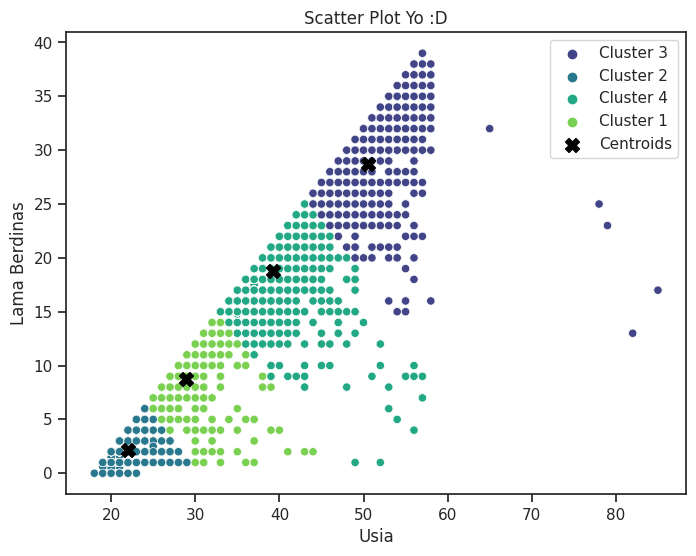

In [ ]:
plt.figure(figsize=(8, 6))
cluster_centers1 = np.array(cluster_centersusiadinastotal) # ubah untuk hasil df lain
sns.scatterplot(x="USIA", y="LAMA BERDINAS", hue='Cluster', data=result_dfusiadinastotal, palette='viridis')  # ubah untuk hasil df lain
plt.scatter(cluster_centers1[:, 0], cluster_centers1[:, 1], marker='X', s=100, c='black', label='Centroids')
plt.title("Scatter Plot Yo :D")
plt.xlabel('Usia')
plt.ylabel('Lama Berdinas')
plt.legend()  # Include this line to display the legend
plt.show()


### Clustering dengan Paralel Programming

#### Function

In [ ]:
import pandas as pd
import numpy as np
from multiprocessing import Pool

def jarak_parallel(args):
    row, cluster_center, orde = args
    sum_val = sum(abs(row - cluster_center)**orde)
    distance = sum_val**(1/orde)
    return distance

def assign_clusters_parallel(args):
    index, row, cluster_centers, orde = args
    distances = [jarak_parallel((row, cluster, orde)) for cluster in cluster_centers]
    min_index = distances.index(min(distances))
    return index, f'Cluster {min_index + 1}'

def update_cluster_centers(data_frame, clusters):
    new_cluster_centers = []
    for cluster_name, points in clusters.items():
        if points:
            cluster_center = data_frame.loc[points].mean().to_numpy()
            new_cluster_centers.append(cluster_center)
        else:
            new_cluster_centers.append(np.nan)
    return new_cluster_centers

def clustering_parallel(data_frame, orde, num_clusters, max_iterations=100, processes=None):
    pool = Pool(processes=processes)
    data_points = [(index, row.to_numpy(), orde) for index, row in data_frame.iterrows()]

    # Initialize cluster centers randomly
    cluster_centers = [data_frame.sample().iloc[0].to_numpy() for _ in range(num_clusters)]
    iterations = 0

    while iterations < max_iterations:
        # Assign data points to clusters in parallel
        assigned_clusters = pool.map(assign_clusters_parallel, [(index, row, cluster_centers, orde) for index, row, _ in data_points])

        # Update cluster centers
        clusters = {}
        for index, cluster_name in assigned_clusters:
            clusters.setdefault(cluster_name, []).append(index)

        new_cluster_centers = update_cluster_centers(data_frame, clusters)

        # Check for convergence
        if np.allclose(new_cluster_centers, cluster_centers, atol=1e-4, equal_nan=True):
            break

        # Update cluster centers for the next iteration
        cluster_centers = new_cluster_centers
        iterations += 1

    # Add a new column to the DataFrame indicating the assigned cluster
    data_frame['Cluster'] = None
    for cluster_name, points in clusters.items():
        data_frame.loc[points, 'Cluster'] = cluster_name

    pool.close()
    pool.join()

    return data_frame, clusters, cluster_centers


#### Contoh(Usia Dan Nilai IMT)

In [ ]:
datausiaimt = df.iloc[:,[2,76]]
datausiaimt

USIA  NILAI IMT
0       34.0  29.796114
1       43.0  24.364563
2       21.0  20.883912
3       28.0  22.911836
4       47.0  23.000885
...      ...        ...
273128  53.0  21.007668
273129  23.0  21.007668
273130  54.0  24.973985
273131  35.0  17.165507
273132  19.0  34.198557

[273133 rows x 2 columns]

In [ ]:
result_df, result_clusters, cluster_centers = clustering_parallel(datausiaimt, 2, 4)

In [ ]:
result_df

USIA  NILAI IMT    Cluster
0       34.0  29.796114  Cluster 1
1       43.0  24.364563  Cluster 2
2       21.0  20.883912  Cluster 3
3       28.0  22.911836  Cluster 1
4       47.0  23.000885  Cluster 4
...      ...        ...        ...
273128  53.0  21.007668  Cluster 4
273129  23.0  21.007668  Cluster 3
273130  54.0  24.973985  Cluster 4
273131  35.0  17.165507  Cluster 2
273132  19.0  34.198557  Cluster 3

[273133 rows x 3 columns]

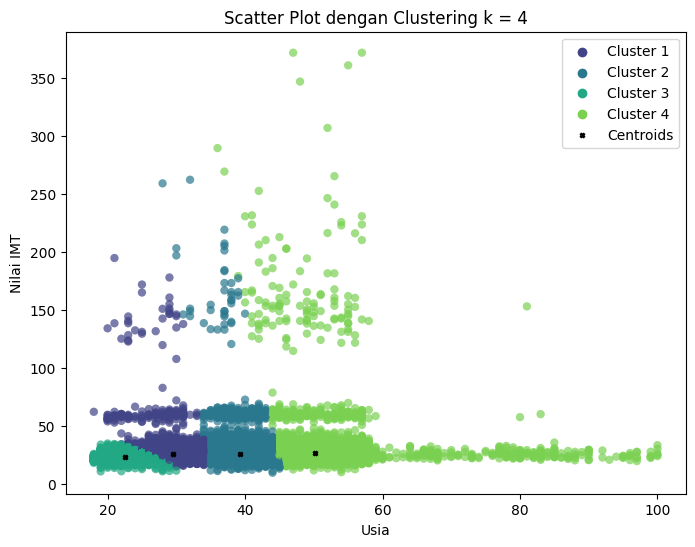

In [ ]:
plt.figure(figsize=(8, 6))
cluster_centers1 = np.array(cluster_centers) # ubah untuk hasil df lain
sns.scatterplot(x="USIA", y="NILAI IMT", hue='Cluster', data=result_df, palette='viridis',linewidth=0, alpha = 0.7)  # ubah untuk hasil df lain
plt.scatter(cluster_centers1[:, 0], cluster_centers1[:, 1], marker='X', s=10, c='black', label='Centroids')
plt.title("Scatter Plot dengan Clustering k = 4")
plt.xlabel('Usia')
plt.ylabel('Nilai IMT')
plt.legend()  # Include this line to display the legend
plt.show()

#### Contoh(Usia Dan Lingkar Pinggang)

In [ ]:
datausiaimt = df.iloc[:,[2,7]]
datausiaimt

USIA  LINGKAR PINGGANG
0       34.0             100.0
1       43.0              80.0
2       21.0              78.0
3       28.0              32.0
4       47.0              32.0
...      ...               ...
273128  53.0              70.0
273129  23.0              78.0
273130  54.0              62.0
273131  35.0              68.0
273132  19.0              33.0

[273133 rows x 2 columns]

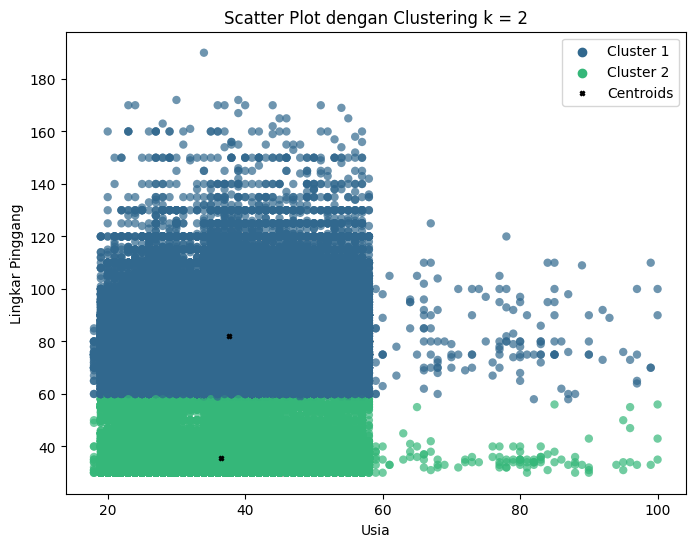

In [ ]:
result_dfusiabb, result_clustersusiabb, cluster_centersusiabb = clustering_parallel(datausiaimt, 2, 2)
plt.figure(figsize=(8, 6))
cluster_centers1 = np.array(cluster_centersusiabb) # ubah untuk hasil df lain
sns.scatterplot(x="USIA", y="LINGKAR PINGGANG", hue='Cluster', data=result_dfusiabb, palette='viridis',linewidth=0, alpha = 0.7)  # ubah untuk hasil df lain
plt.scatter(cluster_centers1[:, 0], cluster_centers1[:, 1], marker='X', s=10, c='black', label='Centroids')
plt.title("Scatter Plot dengan Clustering k = 2")
plt.xlabel('Usia')
plt.ylabel('Lingkar Pinggang')
plt.legend()  # Include this line to display the legend
plt.show()

## Cara 2 (Jit dan Perbandingan)

In [ ]:
#KMEANS NO PARALLEL

def KMeansMakerNoParalell(x, xc, y, yc, cc):
    diff = 1
    j = 0
    begin = 1
    while diff != 0:
        if begin == 1:
            XD = np.zeros((len(cc), len(x)))

        for ccindex in range(len(cc)):
            ED = np.zeros(len(x))
            for xyindex in range(len(x)):
                d1 = (xc[ccindex] - x[xyindex]) ** 2
                d2 = (yc[ccindex] - y[xyindex]) ** 2
                d = np.sqrt(d1 + d2)
                ED[xyindex] = d

            XD[ccindex, :] = ED  # Distance between each point to each cluster point

        C = np.zeros(len(x), dtype=np.int64)  # List of cluster choices

        for xyindex in range(len(x)):
            min_dist = 999999
            for z in range(len(cc)):
                if XD[z, xyindex] < min_dist:  # Shortest distance is the clust
                    min_dist = XD[z, xyindex]
                    pos = z
            C[xyindex] = pos  # Array of all cluster choices per point

        ClusterGroupx = [np.zeros(0) for _ in range(len(cc))]
        ClusterGroupy = [np.zeros(0) for _ in range(len(cc))]
        CentroidNewx = np.zeros(len(cc))
        CentroidNewy = np.zeros(len(cc))

        for z in range(len(x)):
            ClusterGroupx[C[z]] = np.append(ClusterGroupx[C[z]], x[z])
            ClusterGroupy[C[z]] = np.append(ClusterGroupy[C[z]], y[z])

        for z in range(len(cc)):
            CentroidNewx[z] = np.mean(ClusterGroupx[z])
            CentroidNewy[z] = np.mean(ClusterGroupy[z])

        if j == 0:
            diff = 1
            j += 1
        else:
            temp = np.zeros(len(cc))
            for z in range(len(cc)):
                temp[z] = (CentroidNewx[z] - xc[z]) + (CentroidNewy[z] - yc[z])
            diff = np.sum(temp)
            print(diff)

        for z in range(len(cc)):  # Set new cluster points
            xc[z] = np.mean(ClusterGroupx[z])
            yc[z] = np.mean(ClusterGroupy[z])

        begin = 0

    return ClusterGroupx, ClusterGroupy

In [ ]:
#KMEANS YES PARALLEL

@jit(nopython=True, parallel=True)
def KMeansMakerYesParallel(x, xc, y, yc, cc):
    diff = 1
    j = 0
    begin = 1
    while diff != 0:
        if begin == 1:
            XD = np.zeros((len(cc), len(x)))

        for ccindex in range(len(cc)):
            ED = np.zeros(len(x))
            for xyindex in range(len(x)):
                d1 = (xc[ccindex] - x[xyindex]) ** 2
                d2 = (yc[ccindex] - y[xyindex]) ** 2
                d = np.sqrt(d1 + d2)
                ED[xyindex] = d

            XD[ccindex, :] = ED  # Distance between each point to each cluster point

        C = np.zeros(len(x), dtype=np.int64)  # List of cluster choices

        for xyindex in range(len(x)):
            min_dist = 999999
            for z in range(len(cc)):
                if XD[z, xyindex] < min_dist:  # Shortest distance is the clust
                    min_dist = XD[z, xyindex]
                    pos = z
            C[xyindex] = pos  # Array of all cluster choices per point

        ClusterGroupx = [np.zeros(0) for _ in range(len(cc))]
        ClusterGroupy = [np.zeros(0) for _ in range(len(cc))]
        CentroidNewx = np.zeros(len(cc))
        CentroidNewy = np.zeros(len(cc))

        for z in range(len(x)):
            ClusterGroupx[C[z]] = np.append(ClusterGroupx[C[z]], x[z])
            ClusterGroupy[C[z]] = np.append(ClusterGroupy[C[z]], y[z])

        for z in range(len(cc)):
            CentroidNewx[z] = np.mean(ClusterGroupx[z])
            CentroidNewy[z] = np.mean(ClusterGroupy[z])

        if j == 0:
            diff = 1
            j += 1
        else:
            temp = np.zeros(len(cc))
            for z in range(len(cc)):
                temp[z] = (CentroidNewx[z] - xc[z]) + (CentroidNewy[z] - yc[z])
            diff = np.sum(temp)
            print(diff)

        for z in range(len(cc)):  # Set new cluster points
            xc[z] = np.mean(ClusterGroupx[z])
            yc[z] = np.mean(ClusterGroupy[z])

        begin = 0

    return ClusterGroupx, ClusterGroupy

In [ ]:
#Ambil Centroid secara acak
X = df[['USIA', 'NILAI IMT']]
K=4
Centroids = X.sample(n=K)
zx = df['USIA'].values.tolist()
zy = df['NILAI IMT'].values.tolist()
zxc = Centroids['USIA'].values.tolist()
zyc = Centroids['NILAI IMT'].values.tolist()
zcc = Centroids.index.tolist()

3.2545692412883227
1.90972528193004
1.0317254597963093
0.46438506562036963
0.2533161416457368
0.166900189957623
0.1291299928111691
0.18690623353806757
0.13795954449319225
0.15366385407527972
0.2042412902440205
0.2287657535487
0.2756504761971428
0.3644984896196455
0.5245801389628859
0.5404793087405189
0.494874804580796
0.49940513236769135
0.5331583681808851
0.2880425635654227
0.08896050280004175
0.08682339859466737
0.05324123866835251
0.08961888821626474
0.07687436387194069
0.05250526892330143
0.017180637082869765
0.017004348082952703
0.0


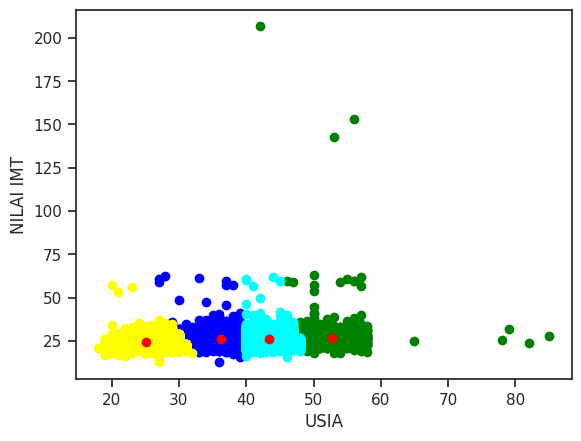

CPU times: user 6.79 s, sys: 133 ms, total: 6.93 s
Wall time: 7.03 s


In [ ]:
%%time
#Versi no parallel
x = zx
y = zy
xc = zxc
yc = zyc
cc = zcc
Groupx, Groupy = KMeansMakerNoParalell(x, xc, y, yc, cc)
color=['blue','green','cyan', 'yellow']
for k in range(K):
    plt.scatter(Groupx[k],Groupy[k],c=color[k])
plt.scatter(xc,yc,c='red')
plt.xlabel('USIA')
plt.ylabel('NILAI IMT')
plt.show()

-3.552713678800501e-14
2.4868995751603507e-14
-1.9184653865522705e-13
0.0


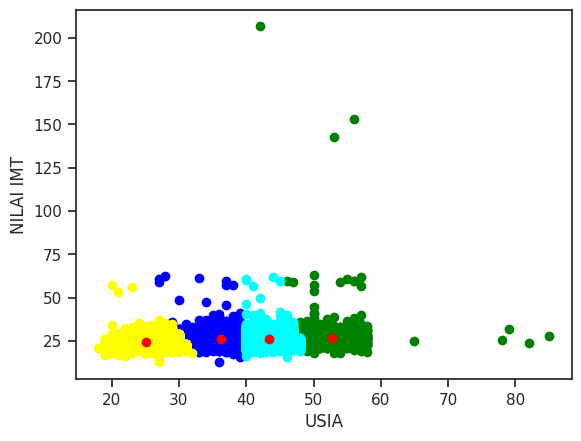

CPU times: user 8.22 s, sys: 172 ms, total: 8.39 s
Wall time: 8.59 s


In [ ]:
%%time
#Versi Yes parallel
x = zx
y = zy
xc = zxc
yc = zyc
cc = zcc
Groupx, Groupy = KMeansMakerYesParallel(x, xc, y, yc, cc)
color=['blue','green','cyan', 'yellow']
for k in range(K):
    plt.scatter(Groupx[k],Groupy[k],c=color[k])
plt.scatter(xc,yc,c='red')
plt.xlabel('USIA')
plt.ylabel('NILAI IMT')
plt.show()

# **Kesimpulan**
1.  Dengan data sebanyak ini tentunya akan sulit untuk mengolah data tanpa menggunakan paralel programming.
2.  Dari hasil clustering yang dibuat sesuai ketentuan (4 cluster) terlihat bahwa cluster tersebut sulit untuk diinterpretasikan.
3. Tidak ada hubungan yang signifikan antara usia dan nilai IMT

